# OPENAI API KEY LOAD FROM DRIVE

## Required Library Installations

In [2]:
pip install -q dotenv

In [3]:
#install Required libraries
!pip install -q langchain

In [4]:
!pip install -q openai

In [ ]:
!pip uninstall -y -q langchain-openai openai langchain
!pip install -U -q langchain langchain-openai openai


In [6]:
!pip install  -q requests

In [ ]:
#install
!pip install -q grandalf

In [ ]:
!pip install -q langchain_community

In [9]:
!pip install -q huggingface_hub


### 📌 Steps to Fetch `.env` File from Google Drive in Google Colab  

- **Mount Google Drive** to access stored files.  
- **Set the path** to your `.env` file in Google Drive.  
- **Install `python-dotenv`** if not already installed.  
- **Load environment variables** using `dotenv`.  
- **Retrieve the OpenAI API key** from the `.env` file.  
- **Use the API key** in OpenAI API requests.  


In [11]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
env_path = "/content/drive/MyDrive/keys/.env"

In [13]:
from dotenv import load_dotenv

In [14]:
load_dotenv(env_path)

True

In [15]:
openai_api_key = os.getenv("OPENAI_API_KEY")
print("API KEY LOADED SUCCESSFULLY " if openai_api_key else "KEY NOT LOADED")

API KEY LOADED SUCCESSFULLY 


# 🔗 LLM Chain & Its Types  

### 📌 What is LLM Chain?  
LLM Chain is a structured way to **connect prompts, models, and logic** in LangChain to perform tasks in a step-by-step manner. It helps in building **modular and efficient AI workflows**.  

---

### 🏷️ Types of LLM Chains  

1️⃣ **Simple Chain**  
   - A basic **input → LLM → output** structure.  
   - Example: Sending a prompt to an AI model and getting a response.  

2️⃣ **Sequential Chain**  
   - The **output of one chain becomes the input** for the next.  
   - Example: Generating a blog outline → Expanding it into full sections.  

3️⃣ **Parallel Chain**  
   - Runs **multiple LLM calls at the same time** and combines the results.  
   - Example: Generating summaries for multiple articles simultaneously.  

4️⃣ **Conditional Chain**  
   - **Chooses a different chain** based on input conditions.  
   - Example: If a user asks about pricing, use a "Pricing Chain"; if technical support, use a "Tech Support Chain".  


## Simple Chain

In [ ]:
# import libraries

from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [ ]:
from langchain_openai import ChatOpenAI

In [ ]:
#create prompt template
prompt = PromptTemplate(
    template = "Generate 5 interasting facts about {topic}",
    input_variables=['topic']
)


In [ ]:
#model
model = ChatOpenAI()


In [ ]:
# create parsers
parser = StrOutputParser()



In [ ]:
#create chain
chain  = prompt | model | parser

In [ ]:
response = chain.invoke({'topic':'crikcet'})

In [ ]:
print(response)

1. Cricket is one of the oldest team sports in the world, with origins dating back to the 16th century in England.

2. The longest ever cricket match lasted a whopping 14 days, played between England and South Africa in 1939.

3. The famous cricket ground, Lord's Cricket Ground in London, is often referred to as the "Home of Cricket" and has hosted some of the most iconic matches in the sport's history.

4. The highest individual score in a test match is held by Brian Lara of the West Indies, who scored an incredible 400 not out against England in 2004.

5. Cricket is the second most popular sport in the world, with billions of fans and players across various countries such as India, Australia, England, and Pakistan.


## 🔗 `get_graph()` & `print_ascii()`

- **`get_graph()`**: Converts the chain into a **graph representation**.  
- **`print_ascii()`**: Displays the graph in a **text-based (ASCII) format**.  


In [ ]:
#visualize chain by using graph
chain.get_graph().print_ascii()

     +-------------+       
     | PromptInput |       
     +-------------+       
            *              
            *              
            *              
    +----------------+     
    | PromptTemplate |     
    +----------------+     
            *              
            *              
            *              
      +------------+       
      | ChatOpenAI |       
      +------------+       
            *              
            *              
            *              
   +-----------------+     
   | StrOutputParser |     
   +-----------------+     
            *              
            *              
            *              
+-----------------------+  
| StrOutputParserOutput |  
+-----------------------+  


## Sequential Chain

**topic > llm > report > llm > Summary**

- here we will use topic to feed llm
- llm will give detailed report
- that report we will send to llm again
- llm will give Summary of that report

## 🔗 Sequential Chain Explanation  

- **Import Required Modules**: Uses `PromptTemplate`, `ChatOpenAI`, and `StrOutputParser`.  
- **Define `Prompt1`**: Generates a **detailed report** based on the given `{topic}`.  
- **Define `Prompt2`**: Extracts a **5-point summary** from the generated report using `{text}`.  
- **Initialize `ChatOpenAI` Model**: Uses `ChatOpenAI()` to process prompts and generate text.  
- **Define `StrOutputParser`**: Converts the model's output into a **string format** for easy processing.  
- **Create Chain**:  
  - **Step 1**: `Prompt1` generates a detailed report.  
  - **Step 2**: The report is passed to `ChatOpenAI` for response generation.  
  - **Step 3**: `StrOutputParser` processes the output into a string.  
  - **Step 4**: `Prompt2` takes the report and extracts a **5-point summary**.  
  - **Step 5**: The summary is generated using `ChatOpenAI` and processed by `StrOutputParser`.  
- **Invoke Chain**: Executes the entire sequence with `'Jungle'` as the topic.  
- **Print Response**: Displays the final summarized **5-point output**.  


In [ ]:
from ast import Str
#sequential chains
# all the library and env has enabled
# this is our prompt1 which generates detailed report on given topic
Prompt1 = PromptTemplate(
    template = 'Generate a detailed report on {topic}',
    input_variables=['topic']
)

Prompt2 = PromptTemplate(
    template = 'Generate a 5 pointer summary from the following text \n {text}',
    input_variables=['text']
)
# model defined
model = ChatOpenAI()

#parser defined
parser = StrOutputParser()

# define chain

chain  = Prompt1 | model | parser | Prompt2 | model | parser

response = chain.invoke({'topic':'Jungle'})

print(response)


1. Jungles are lush, dense forests found in tropical regions close to the equator, known for their rich biodiversity and complex ecosystems.
2. High levels of rainfall ranging from 80 to 400 inches per year create a humid environment perfect for supporting a wide range of plant species in jungles.
3. Jungles are home to a diverse array of animal species, including monkeys, birds, snakes, insects, and large predators like jaguars and tigers, due to ample food sources and shelter provided by dense vegetation.
4. Jungles play a crucial role in regulating Earth's climate by absorbing carbon dioxide, helping mitigate climate change, and regulating the water cycle to prevent soil erosion.
5. Despite their ecological significance, jungles are facing threats from human activities such as deforestation, mining, and agriculture, highlighting the importance of conservation efforts to protect and preserve these vital ecosystems.


In [ ]:
#visualize chain by using graph
chain.get_graph().print_ascii()

     +-------------+       
     | PromptInput |       
     +-------------+       
            *              
            *              
            *              
    +----------------+     
    | PromptTemplate |     
    +----------------+     
            *              
            *              
            *              
      +------------+       
      | ChatOpenAI |       
      +------------+       
            *              
            *              
            *              
   +-----------------+     
   | StrOutputParser |     
   +-----------------+     
            *              
            *              
            *              
+-----------------------+  
| StrOutputParserOutput |  
+-----------------------+  
            *              
            *              
            *              
    +----------------+     
    | PromptTemplate |     
    +----------------+     
            *              
            *              
            *       

# Parallel Chain


## Definition
In **LangChain**, a **Parallel Chain** refers to the ability to execute multiple chains concurrently to improve efficiency and reduce latency. Instead of running chains sequentially, parallel execution enables independent tasks to be processed simultaneously, leveraging asynchronous programming.

## Explanation
LangChain provides tools to execute multiple chains in parallel, which is useful when dealing with independent queries or multiple tasks that do not depend on each other's output.

### **Key Benefits of Parallel Chains**
1. **Faster Execution:** Since tasks run concurrently, total execution time is reduced.
2. **Optimized Resource Usage:** Utilizes available computational resources more efficiently.
3. **Better User Experience:** Enhances response time for applications using multiple independent LLM calls.


- we are using llama model

In [ ]:
env_path

'/content/drive/MyDrive/keys/.env'

In [ ]:
load_dotenv(env_path)

api_key = os.environ.get("LLAMA_API_KEY")
print("LLAMA API CONFIGURE SUCCESSFULLY " if api_key else "NOT LOADING LLAMA ")

LLAMA API CONFIGURE SUCCESSFULLY 


We will use all the libraries again for parallel chains

In [ ]:
#sample Hugging face model before applying to parallel chain example
import os
from langchain_community.llms import HuggingFaceHub
from dotenv import load_dotenv
load_dotenv(env_path)
hf_token = os.getenv("HUGGINGFACEHUB_API_TOKEN")
print("HF KEY SUCCESS" if hf_token else "HF KEY FAILED")

llm  = HuggingFaceHub(
    repo_id = "meta-llama/Llama-3.1-8B",
    model_kwargs = {"temperature": 0.7},

)

response = llm.invoke("what is quantum computer in simple way ?")
print(response)

HF KEY SUCCESS
what is quantum computer in simple way ??

Quntum computing is like using many paths at the same time to get to the destination faster. Classical computers use bits that are either 0 or 1. Quantum computers use quantum bits, or qubits, which can be 0, 1, or both at the same time. This is because of a property called superposition in quantum physics. Quantum computers also use another property called entanglement, which allows qubits to be connected in such a way that the state of one can instantly affect the state of the other, no matter the distance between them. This allows quantum computers to perform many calculations simultaneously and can solve certain problems much faster than classical computers.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnableParallel
from langchain_community.llms import HuggingFaceHub
from dotenv import load_dotenv

load_dotenv()

# Define models
model1 = ChatOpenAI()
model2 = HuggingFaceHub(
    repo_id="meta-llama/Llama-3.1-8B",
    model_kwargs={"temperature": 0.7},
)

# Define prompts
prompt1 = PromptTemplate(
    template="Generate Short and Simple notes from the following text \n {text}",
    input_variables=["text"],
)

prompt2 = PromptTemplate(
    template="Generate 5 short question answers from the following text \n {text}",
    input_variables=["text"],
)

prompt3 = PromptTemplate(
    template="Merge the provided notes and Quiz into a single document \n Notes: {notes} \n Quiz: {Quiz}",
    input_variables=["notes", "Quiz"],
)

parset = StrOutputParser()

# Create separate chains
parallel_chain = RunnableParallel(
    {
        "notes": prompt1 | model1 | parset,
        "Quiz": prompt2 | model2 | parset,
    }
)

merge_chain = prompt3 | model1 | parset

# First, run parallel_chain to generate notes and quiz
intermediate_result = parallel_chain.invoke({"text": text})

# Then, pass the results to merge_chain
final_result = merge_chain.invoke(intermediate_result)

print(final_result)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'post' (from 'huggingface_hub.inference._client') is deprecated and will be removed from version '0.31.0'. Making direct POST requests to the inference server is not supported anymore. Please use task methods instead (e.g. `InferenceClient.chat_completion`). If your use case is not supported, please open an issue in https://github.com/huggingface/huggingface_hub.
  warnings.warn(warning_message, FutureWarning)


Support vector machines (SVMs) are supervised learning methods used for classification, regression, and outliers detection. 

Advantages of SVMs include their effectiveness in high dimensional spaces, ability to work well when there are more dimensions than samples, memory efficiency, and versatility with different kernel functions. 

Disadvantages of SVMs include the risk of overfitting when the number of features is much greater than samples and the fact that they do not directly provide probability estimates. 

1. **Q:** What are the advantages of Support Vector Machines (SVMs)?
   **A:** SVMs are effective in high dimensional spaces, memory efficient, versatile in specifying kernel functions, and still effective when the number of dimensions is greater than the number of samples.

2. **Q:** What makes SVMs memory efficient?
   **A:** SVMs use only a subset of training points in the decision function, called support vectors.

3. **Q:** Can we specify custom kernel functions in SVMs?

In [ ]:
chain.get_graph().print_ascii()

            +---------------------------+            
            | Parallel<notes,quiz>Input |            
            +---------------------------+            
                 **               **                 
              ***                   ***              
            **                         **            
+----------------+                +----------------+ 
| PromptTemplate |                | PromptTemplate | 
+----------------+                +----------------+ 
          *                               *          
          *                               *          
          *                               *          
  +------------+                  +----------------+ 
  | ChatOpenAI |                  | HuggingFaceHub | 
  +------------+                  +----------------+ 
          *                               *          
          *                               *          
          *                               *          
+-----------------+         

#Conditional Chain

A **Conditional Chain** in LangChain allows you to control the flow of execution based on conditions. This means you can dynamically decide which chain to execute depending on the input.

**Key Features of Conditional Chains**
- Dynamically select chains based on input.
- Use a default chain if no condition matches.
- Can be used for routing different types of queries.

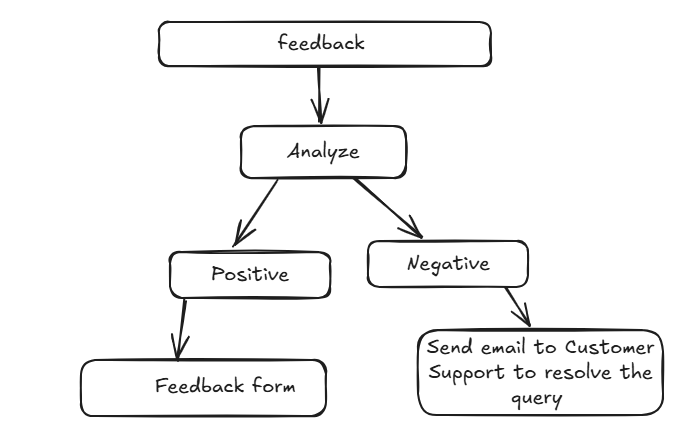

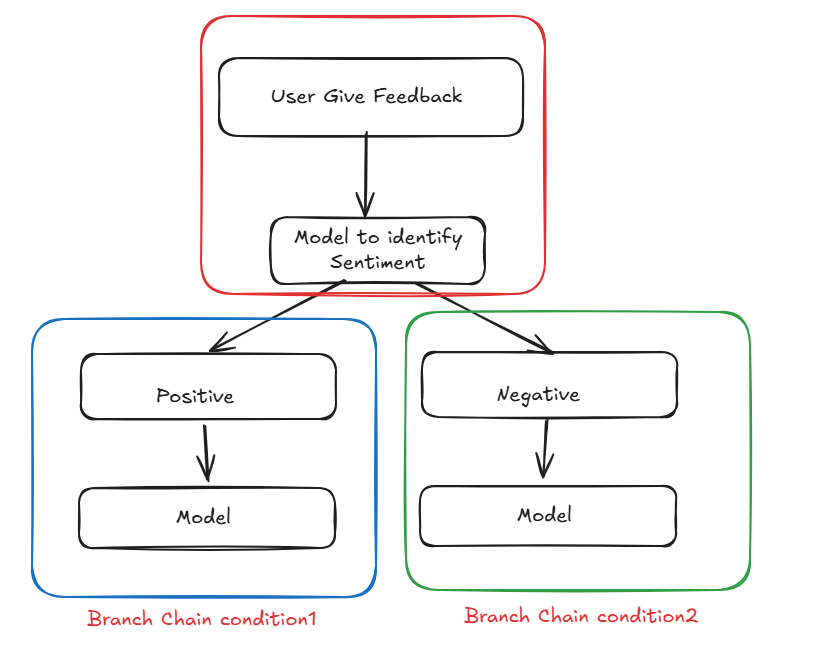

In [46]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnableParallel, RunnableBranch, RunnableLambda
from langchain_core.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field
from typing import Literal

load_dotenv()

model = ChatOpenAI()

parser = StrOutputParser()


class Feedback(BaseModel):
  sentiment: Literal['positive', 'negative'] = Field(description ='Give the sentiment of the feedback')


parser2 = PydanticOutputParser(pydantic_object=Feedback)


prompt1 = PromptTemplate(
    template = 'Classifiy the sentiment of the following Feedback text into positive or negative \n{feedback} \n {format_instruction}',
    input_variables = ['feedback'],
    partial_variables={'format_instruction':parser2.get_format_instructions()}
)


classifier_chain = prompt1 | model | parser2
#this is negative but there is no gaurantee it will come negative/positive all the time if it gives "the sentiment is negative " then it will be a problem for us
#
# we need to structure the output to do that we use PydanticOutputParser

prompt2 = PromptTemplate(
    template = 'write an appropriate response to this positive feedback \n {feedback} ',
    input_variables=['feedback']
)

prompt3 = PromptTemplate(
    template = 'write an appropriate response to this negative feedback \n {feedback} ',
    input_variables=['feedback']
)

#branch chain

branch_chain = RunnableBranch(
    (lambda x:x.sentiment == 'positive', prompt2 | model | parser ),
    (lambda x:x.sentiment == 'negative', prompt3 | model | parser ),
    #defualt condition we need Runnable lambda
    RunnableLambda(lambda x:'could not find sentiment')
)

chain_cond = classifier_chain | branch_chain
print(chain_cond.invoke({'feedback': 'this is beutiful phone'}))

chain_cond.get_graph().print_ascii()
 # Convert to a better graph representation

Thank you so much for your kind words! I'm glad to hear that you had a positive experience. Your feedback means a lot to me. If you have any more comments or suggestions, please feel free to share.
    +-------------+      
    | PromptInput |      
    +-------------+      
            *            
            *            
            *            
   +----------------+    
   | PromptTemplate |    
   +----------------+    
            *            
            *            
            *            
     +------------+      
     | ChatOpenAI |      
     +------------+      
            *            
            *            
            *            
+----------------------+ 
| PydanticOutputParser | 
+----------------------+ 
            *            
            *            
            *            
       +--------+        
       | Branch |        
       +--------+        
            *            
            *            
            *            
    +--------------+  

# Example 2 : Conditional Chain

In [48]:

from langchain.schema.runnable import RunnableLambda
from langchain.chains.llm import LLMChain
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate

llm = ChatOpenAI()

# define prompts
positve_prompt = PromptTemplate.from_template("Give a motivational quote about {topic}.")
negative_prompt = PromptTemplate.from_template("Describe a historical failure related to {topic}.")

# define chains
positive_chain = LLMChain(llm =llm , prompt = positve_prompt)
negative_chain = LLMChain(llm =llm , prompt = negative_prompt)


# conditional function
def positivity_check(input_dict):
  return "Success" in input_dict['topic'].lower()

# conditional Runnbale
conditional_chain = RunnableLambda(lambda x:positive_chain if positivity_check(x) else negative_chain)

# run the chain
output = conditional_chain.invoke({'topic':"fail"})


print(output)



{'topic': 'fail', 'text': 'One historical failure related to faith is the Crusades. The Crusades were a series of religious wars sanctioned by the Latin Church in the medieval period. The goal of the Crusades was to recapture the Holy Land from Muslim rule. However, over the course of several centuries, the Crusades resulted in a series of military failures, with many lives lost on both sides.\n\nThe Crusades were marked by religious intolerance, brutality, and greed. The Crusaders often committed atrocities against innocent civilians, including massacres and pillaging. Additionally, the Crusades failed to achieve their ultimate goal of permanently retaking the Holy Land. Despite numerous attempts, the Crusaders were ultimately driven out of the region and failed to establish lasting Christian control.\n\nThe legacy of the Crusades is one of bloodshed, division, and religious strife. The failure of the Crusades serves as a cautionary tale about the dangers of religious extremism and th

--- THE END ---